<a href="https://colab.research.google.com/github/Sidhtang/30-day-ml-challenge-/blob/main/day_19_20_question_answering_usin_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#To build our QA system we’ll use the SubjQA dataset,2
 #which consists of more than
#10,000 customer reviews in English about products and services in six domains: Trip‐
#Advisor, Restaurants, Movies, Books, Electronics, and Grocery

In [2]:
!pip install datasets
from datasets import get_dataset_config_names
domains = get_dataset_config_names("subjqa")
domains


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 527.3/527.3 kB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.9/39.9 MB 9.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 9.1 MB/s eta 0:00:00
  Attempting uninstall: pyarrow
    Found existing installation: pyarrow 14.0.2
    Uninstalling pyarrow-14.0.2:
      Successfully uninstalled pyarrow-14.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.4.1 requires pyarrow<15.0.0a0,>=14.0.1, but you have pyarrow 17.0.0 which is incompatible.
ibis-framework 8.0.0 requires pyarrow<16,>=2, but you have pyarrow 17.0.0 which is incompatible.


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


The repository for subjqa contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/subjqa.
You can avoid this prompt in future by passing the argument `trust_remote_code=True`.

Do you wish to run the custom code? [y/N] y


['books', 'electronics', 'grocery', 'movies', 'restaurants', 'tripadvisor']

In [3]:
from datasets import load_dataset
subjqa = load_dataset("subjqa", name="electronics")

Generating train split:   0%|          | 0/1295 [00:00<?, ? examples/s]

/root/.cache/huggingface/modules/datasets_modules/datasets/subjqa/2c12e496c4c675ab4a57ffb5d3f538f2e7b89793956e50da37126393ce23b6c6/subjqa.py:189: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  if pd.unique(d["human_ans_spans"])[0] != "ANSWERNOTFOUND":
/root/.cache/huggingface/modules/datasets_modules/datasets/subjqa/2c12e496c4c675ab4a57ffb5d3f538f2e7b89793956e50da37126393ce23b6c6/subjqa.py:189: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  if pd.unique(d["human_ans_spans"])[0] != "ANSWERNOTFOUND":
/root/.cache/huggingface/modules/datasets_modules/datasets/subjqa/2c12e496c4c675ab4a57ffb5d3f538f2e7b89793956e50da37126393ce23b6c6/subjqa.py:189: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future ve

Generating test split:   0%|          | 0/358 [00:00<?, ? examples/s]

/root/.cache/huggingface/modules/datasets_modules/datasets/subjqa/2c12e496c4c675ab4a57ffb5d3f538f2e7b89793956e50da37126393ce23b6c6/subjqa.py:189: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  if pd.unique(d["human_ans_spans"])[0] != "ANSWERNOTFOUND":
/root/.cache/huggingface/modules/datasets_modules/datasets/subjqa/2c12e496c4c675ab4a57ffb5d3f538f2e7b89793956e50da37126393ce23b6c6/subjqa.py:189: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  if pd.unique(d["human_ans_spans"])[0] != "ANSWERNOTFOUND":
/root/.cache/huggingface/modules/datasets_modules/datasets/subjqa/2c12e496c4c675ab4a57ffb5d3f538f2e7b89793956e50da37126393ce23b6c6/subjqa.py:189: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future ve

Generating validation split:   0%|          | 0/255 [00:00<?, ? examples/s]

/root/.cache/huggingface/modules/datasets_modules/datasets/subjqa/2c12e496c4c675ab4a57ffb5d3f538f2e7b89793956e50da37126393ce23b6c6/subjqa.py:189: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  if pd.unique(d["human_ans_spans"])[0] != "ANSWERNOTFOUND":
/root/.cache/huggingface/modules/datasets_modules/datasets/subjqa/2c12e496c4c675ab4a57ffb5d3f538f2e7b89793956e50da37126393ce23b6c6/subjqa.py:189: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  if pd.unique(d["human_ans_spans"])[0] != "ANSWERNOTFOUND":
/root/.cache/huggingface/modules/datasets_modules/datasets/subjqa/2c12e496c4c675ab4a57ffb5d3f538f2e7b89793956e50da37126393ce23b6c6/subjqa.py:189: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future ve

In [4]:
print(subjqa["train"]["answers"][1])

{'text': ['Bass is weak as expected', 'Bass is weak as expected, even with EQ adjusted up'], 'answer_start': [1302, 1302], 'answer_subj_level': [1, 1], 'ans_subj_score': [0.5083333253860474, 0.5083333253860474], 'is_ans_subjective': [True, True]}


In [5]:
import pandas as pd
dfs = {split: dset.to_pandas() for split, dset in subjqa.flatten().items()}
for split, df in dfs.items():
 print(f"Number of questions in {split}: {df['id'].nunique()}")


Number of questions in train: 1295
Number of questions in test: 358
Number of questions in validation: 255


In [6]:
qa_cols = ["title", "question", "answers.text",
 "answers.answer_start", "context"]
sample_df = dfs["train"][qa_cols].sample(2, random_state=7)
sample_df

,title,question,answers.text,answers.answer_start,context
791,B005DKZTMG,Does the keyboard lightweight?,[this keyboard is compact],[215],I really like this keyboard. I give it 4 star...
1159,B00AAIPT76,How is the battery?,[],[],I bought this after the first spare gopro batt...


In [7]:
start_idx = sample_df["answers.answer_start"].iloc[0][0]
end_idx = start_idx + len(sample_df["answers.text"].iloc[0][0])
sample_df["context"].iloc[0][start_idx:end_idx]

'this keyboard is compact'

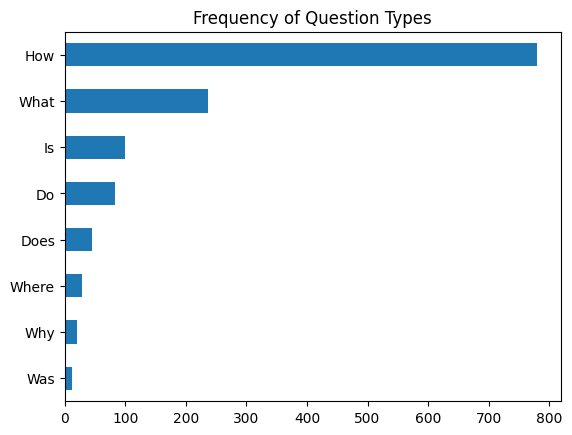

In [8]:
import matplotlib.pyplot as plt
counts = {}
question_types = ["What", "How", "Is", "Does", "Do", "Was", "Where", "Why"]
for q in question_types:
 counts[q] = dfs["train"]["question"].str.startswith(q).value_counts()[True]
pd.Series(counts).sort_values().plot.barh()
plt.title("Frequency of Question Types")
plt.show()

In [9]:
for question_type in ["How", "What", "Is"]:
  for question in (
      dfs["train"][dfs["train"].question.str.startswith(question_type)]
      .sample(n=3, random_state=42)['question']
  ):
    print(question)

How is the camera?
How do you like the control?
How fast is the charger?
What is direction?
What is the quality of the construction of the bag?
What is your impression of the product?
Is this how zoom works?
Is sound clear?
Is it a wireless keyboard?


In [10]:
# Frame the supervised learning problem.
# Tokenize and encode text for QA tasks.
# Deal with long passages that exceed a model’s maximum

In [11]:
#The most common way to extract answers from text is by framing the problem as a
#span classification task, where the start and end tokens of an answer span act as the
#labels that a model needs to predict.

In [12]:
#we’ll use a fine-tuned MiniLM model since it is fast
#to train and will allow us to quickly iterate on the techniques that we’ll be exploring.8
#As usual, the first thing we need is a tokenizer to encode our texts,

In [13]:
from transformers import AutoTokenizer
model_ckpt="deepset/minilm-uncased-squad2"
tokenizer = AutoTokenizer.from_pretrained(model_ckpt)

tokenizer_config.json:   0%|          | 0.00/107 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/477 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

In [14]:
question = "How much music can this hold?"
context = """An MP3 is about 1 MB/minute, so about 6000 hours depending on \
file size."""
inputs = tokenizer(question, context, return_tensors="pt")



In [15]:
print(tokenizer.decode(inputs["input_ids"][0]))

[CLS] how much music can this hold? [SEP] an mp3 is about 1 mb / minute, so about 6000 hours depending on file size. [SEP]


In [16]:
import torch
from transformers import AutoModelForQuestionAnswering
model = AutoModelForQuestionAnswering.from_pretrained(model_ckpt)
with torch.no_grad():
  outputs = model(**inputs)
  print(outputs)

model.safetensors:   0%|          | 0.00/133M [00:00<?, ?B/s]

Some weights of the model checkpoint at deepset/minilm-uncased-squad2 were not used when initializing BertForQuestionAnswering: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForQuestionAnswering from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForQuestionAnswering from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


QuestionAnsweringModelOutput(loss=None, start_logits=tensor([[-0.9862, -4.7750, -5.4025, -5.2378, -5.2863, -5.5117, -4.9819, -6.1880,
         -0.9862,  0.2596, -0.2144, -1.7136,  3.7806,  4.8561, -1.0546, -3.9097,
         -1.7374, -4.5944, -1.4278,  3.9949,  5.0391, -0.2018, -3.0193, -4.8549,
         -2.3107, -3.5110, -3.5713, -0.9862]]), end_logits=tensor([[-0.9623, -5.4733, -5.0326, -5.1639, -5.4278, -5.5151, -5.1749, -4.6233,
         -0.9623, -3.7855, -0.8715, -3.7745, -3.0161, -1.1780,  0.1758, -2.7365,
          4.8934,  0.3046, -3.1761, -3.2762,  0.8937,  5.6606, -0.3623, -4.9554,
         -3.2531, -0.0914,  1.6211, -0.9623]]), hidden_states=None, attentions=None)


In [17]:
start_logits = outputs.start_logits
end_logits = outputs.end_logits





In [18]:
print(f"Input IDs shape: {inputs.input_ids.size()}")
print(f"Start logits shape: {start_logits.size()}")
print(f"End logits shape: {end_logits.size()}")

Input IDs shape: torch.Size([1, 28])
Start logits shape: torch.Size([1, 28])
End logits shape: torch.Size([1, 28])


In [19]:
import torch
start_idx = torch.argmax(start_logits)
end_idx = torch.argmax(end_logits) + 1
answer_span = inputs["input_ids"][0][start_idx:end_idx]
answer = tokenizer.decode(answer_span)
print(f"Question: {question}")
print(f"Answer: {answer}")


Question: How much music can this hold?
Answer: 6000 hours


In [20]:
from transformers import pipeline
pipe = pipeline("question-answering", model=model, tokenizer=tokenizer)
pipe(question=question, context=context, topk=3)

/usr/local/lib/python3.10/dist-packages/transformers/pipelines/question_answering.py:326: UserWarning: topk parameter is deprecated, use top_k instead
  warnings.warn("topk parameter is deprecated, use top_k instead", UserWarning)


[{'score': 0.2651616930961609, 'start': 38, 'end': 48, 'answer': '6000 hours'},
 {'score': 0.22082944214344025,
  'start': 16,
  'end': 48,
  'answer': '1 MB/minute, so about 6000 hours'},
 {'score': 0.10253512114286423,
  'start': 16,
  'end': 27,
  'answer': '1 MB/minute'}]

In [21]:
pipe(question="Why is there no data?", context=context,
 handle_impossible_answer=True)


{'score': 0.9068413972854614, 'start': 0, 'end': 0, 'answer': ''}

In [22]:
pipe(question="Why is there no data?", context=context,
 handle_impossible_answer=True)


{'score': 0.9068413972854614, 'start': 0, 'end': 0, 'answer': ''}

In [23]:
example = dfs["train"].iloc[0][["question", "context"]]
tokenized_example = tokenizer(example["question"], example["context"],
 return_overflowing_tokens=True, max_length=100,
 stride=25)

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.


In [24]:
for idx, window in enumerate(tokenized_example["input_ids"]):
 print(f"Window #{idx} has {len(window)} tokens")


Window #0 has 100 tokens
Window #1 has 88 tokens


In [25]:
for window in tokenized_example["input_ids"]:
 print(tokenizer.decode(window))

[CLS] how is the bass? [SEP] i have had koss headphones in the past, pro 4aa and qz - 99. the koss portapro is portable and has great bass response. the work great with my android phone and can be " rolled up " to be carried in my motorcycle jacket or computer bag without getting crunched. they are very light and do not feel heavy or bear down on your ears even after listening to music with them on all day. the sound is [SEP]
[CLS] how is the bass? [SEP] and do not feel heavy or bear down on your ears even after listening to music with them on all day. the sound is night and day better than any ear - bud could be and are almost as good as the pro 4aa. they are " open air " headphones so you cannot match the bass to the sealed types, but it comes close. for $ 32, you cannot go wrong. [SEP]


In [24]:
# LEts have some intution about how qa models work and can extract ansers from text

In [24]:
#using haystack to build a QA pipeline
# modern day qa models are based on retriever reader achitecture
# retreiver are usually  categorised as sparse or dense
# relevance of query  and a document is determined by computong the inner product of the vectors


In [ ]:
# @title  haystack is based on reader and retreiver only
#we’ll be exploring both sparse and dense retrievers in this chapter, we’ll use the
##ElasticsearchDocumentStore, which is compatible with both retriever types. Elastic‐
#search is a search engine that is capable of handling a diverse range of data types,
#including textual, numerical, geospatial, structured, and unstructured. Its ability to
#store huge volumes of data and quickly filter it with full-text search features makes i

In [26]:
url = """https://artifacts.elastic.co/downloads/elasticsearch/\
elasticsearch-7.9.2-linux-x86_64.tar.gz"""
!wget -nc -q {url}
!tar -xzf elasticsearch-7.9.2-linux-x86_64.tar.gz


In [27]:
import os
from subprocess import Popen,PIPE, STDOUT
!chown -R daemon:daemon elasticsearch-7.9.2
es_server = Popen(args=['elasticsearch-7.9.2/bin/elasticsearch'],
 stdout=PIPE, stderr=STDOUT, preexec_fn=lambda: os.setuid(1))
# Wait until Elasticsearch has started
!sleep 30

/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(


In [29]:
!curl -X GET "localhost:9200/?pretty"

{
  "name" : "32e9c367ef83",
  "cluster_name" : "elasticsearch",
  "cluster_uuid" : "WVJw_TF2RpWszhUKX4BXog",
  "version" : {
    "number" : "7.9.2",
    "build_flavor" : "default",
    "build_type" : "tar",
    "build_hash" : "d34da0ea4a966c4e49417f2da2f244e3e97b4e6e",
    "build_date" : "2020-09-23T00:45:33.626720Z",
    "build_snapshot" : false,
    "lucene_version" : "8.6.2",
    "minimum_wire_compatibility_version" : "6.8.0",
    "minimum_index_compatibility_version" : "6.0.0-beta1"
  },
  "tagline" : "You Know, for Search"
}


In [34]:
!pip install haystack-ai

In [39]:
!pip install elasticsearch-haystack



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 523.3/523.3 kB 8.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.4/64.4 kB 4.1 MB/s eta 0:00:00


In [40]:
from haystack_integrations.document_stores.elasticsearch import ElasticsearchDocumentStore

In [41]:
document_store = ElasticsearchDocumentStore(return_embedding=True)

In [ ]:
#By default, ElasticsearchDocumentStore creates two indices on Elasticsearch: one
#called document for (you guessed it) storing documents, and another called label for
#  our purposes
#we’ll include the item_id and q_review_id columns of SubjQA so we can filter by
#product and question ID, along with the corresponding training split.

In [48]:
!pip install farm-haystack

from haystack_integrations.document_stores.elasticsearch import ElasticsearchDocumentStore
from haystack.schema import Document # Import the Document class

document_store = ElasticsearchDocumentStore(return_embedding=True)

for split, df in dfs.items():
    # Exclude duplicate reviews
    docs = [
        Document(
            content=row["context"],
            meta={
                "item_id": row["title"],
                "question_id": row["id"],
                "split": split
}
        )
        for _, row in df.drop_duplicates(subset=["

SyntaxError: unterminated string literal (detected at line 19) (<ipython-input-48-a4ca560fc0a3>, line 19)

In [6]:
!pip install farm-haystack==1.13.1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.6/64.6 kB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 17.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 2.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.9/93.9 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.3/49.3 kB 3.0 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of sentence-transformers to determine which version is compatible with other requirements. This could take a while.
INFO: pip is still looking at multiple versions of sentence-transformers to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 5.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Using cached nvidia_cuda_nvrt